<a href="https://colab.research.google.com/github/RayGone/Thesis/blob/main/Experiments/5.4%20Hybrid%20Approach/MLP/BERT_Embedding_As_Feature_4SA/NepBERTa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install transformers tokenizers datasets -q
# !pip install -q --upgrade accelerate einops xformers

In [ ]:
import numpy as np
import random
import os
import tensorflow as tf
from transformers import set_seed

rand_seed = 942

def seed_everything(seed=0):
    random.seed(seed) # random
    os.environ['PYTHONHASHSEED'] = str(seed) # python enviroment
    np.random.seed(seed) # numpy
    tf.keras.utils.set_random_seed(seed) # tensorflow
    tf.random.set_seed(seed) # tensorflow
    set_seed(seed) # hugging_face transformer

seed_everything(rand_seed)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import datasets

data = datasets.load_dataset("raygx/NepCov19TweetsPlus")\
        .rename_columns({"Sentiment":"label","Sentences":"text"})\
        .shuffle(rand_seed)['train']\
        .train_test_split(test_size=0.2)
data


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 33232
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 8309
    })
})

In [ ]:
def LabelEncoding(x):
    if x['label']==-1:
        x['label'] =  2
    return x

data = data.map(
        LabelEncoding,
        num_proc=2)

data['train'][:5]

#0:   0%|          | 0/16616 [00:00<?, ?ex/s]

#1:   0%|          | 0/16616 [00:00<?, ?ex/s]

#0:   0%|          | 0/4155 [00:00<?, ?ex/s]

#1:   0%|          | 0/4154 [00:00<?, ?ex/s]

{'label': [2, 1, 1, 0, 1],
 'text': ['कोभिड सन्दर्भमा कर्तव्यच्युत व्यवहार देखाएको सरकारका निम्ति सर्वोच् च अदालतले बिहीबार फेरि आदेश जारी गर्नुपरेको छ निशुल्क परीक्षण र उपचार उपचार गर्नू',
  'राष्ट्रिय सभाअन्तर्गतको राष्ट्रिय सरोकार तथा समन्वय समितिले विश्व्यापी महामारीका रूपमा फैलिएको कोरोना भाइरस कोभिड संक्रमणको जोखिमलाई ध्यानमा राखी मुलुकमा लकडाउन लाई अझै निरन्तरता दिनुपर्ने बताएको छ',
  'यति त राख्नु अत्यन्त जरुरी छ यसले समुदायलाई थप सचेत तुल्याउँछ र समग्रमा कोभिड नियन्त्रणमा सहयोग पुर्याउँछ अनि संक्रमित को स्वास्थ्य अवस्था सामान्य गम्भीर अतिगम्भिर भनी पनि छुट्टाउनु पर्यो',
  'पूर्वाधार विकासमा कोभिड को प्रभाव बारेमा सँगको मेरो कुराकानीको अंश',
  'कोभिड परीक्षणका लागि अन्य जिल्ला स्वाब पठाउनुपर्ने बाध्यता हट्ने भएको छ पूर्वाधार र आवश् यक जनशक्तिको व्यवस्थापन गरेर एक महीनापछि मेसिन सञ् चालन गरिने']}

In [ ]:
%%time

def preprocess_function(rows):
    return tokenizer(rows['text'],truncation=True)

print("Tokenizing the data")
tokenized_inputs = data.map(
    preprocess_function,
    batched=True,
    num_proc=4,
    remove_columns=data["train"].column_names,
)
# tokenized_inputs = tokenized_inputs.remove_columns(['token_type_ids'])

tokenized_inputs['train'] = tokenized_inputs['train'].add_column(
    name="label",column=data['train']['label']
)
tokenized_inputs['test'] = tokenized_inputs['test'].add_column(
    name="label",column=data['test']['label']
)

tokenized_inputs

Tokenizing the data
        

#1:   0%|          | 0/9 [00:00<?, ?ba/s]

#0:   0%|          | 0/9 [00:00<?, ?ba/s]

#2:   0%|          | 0/9 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


#3:   0%|          | 0/9 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


#0:   0%|          | 0/3 [00:00<?, ?ba/s]

#1:   0%|          | 0/3 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


#2:   0%|          | 0/3 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


#3:   0%|          | 0/3 [00:00<?, ?ba/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


CPU times: user 398 ms, sys: 362 ms, total: 759 ms
Wall time: 3.62 s


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
        num_rows: 33232
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
        num_rows: 8309
    })
})

In [ ]:
from transformers import AutoConfig
from transformers import BertTokenizerFast
from transformers import TFAutoModelForSequenceClassification, PreTrainedTokenizerFast

print("Loading Model")
i = 1
model_id = ['Shushant/nepaliBERT','NepBERTa/NepBERTa','bert-base-multilingual-uncased','xlm-roberta-base',
            'raygx/NepaliLM-BERT'][i]

print("Intialization: Pretrained {}".format(model_id))

try:
    tokenizer = PreTrainedTokenizerFast.from_pretrained(model_id)
except:
    tokenizer = BertTokenizerFast.from_pretrained(model_id)


try:
    model = TFAutoModelForSequenceClassification.from_pretrained(model_id,
              id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
              label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2},ignore_mismatched_sizes=True)
except:
    model = TFAutoModelForSequenceClassification.from_pretrained(model_id,
              id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
              label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2},ignore_mismatched_sizes=True,from_pt=True)

model.summary(), model.config

Loading Model
Intialization: Pretrained NepBERTa/NepBERTa


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at NepBERTa/NepBERTa and are newly initialized: ['classifier', 'bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


(None,
 BertConfig {
   "_name_or_path": "NepBERTa/NepBERTa",
   "architectures": [
     "BertForMaskedLM"
   ],
   "attention_probs_dropout_prob": 0.1,
   "classifier_dropout": null,
   "hidden_act": "gelu",
   "hidden_dropout_prob": 0.1,
   "hidden_size": 768,
   "id2label": {
     "0": "NEUTRAL",
     "1": "POSITIVE",
     "2": "NEGATIVE"
   },
   "initializer_range": 0.02,
   "intermediate_size": 3072,
   "label2id": {
     "NEGATIVE": 2,
     "NEUTRAL": 0,
     "POSITIVE": 1
   },
   "layer_norm_eps": 1e-12,
   "max_position_embeddings": 512,
   "model_type": "bert",
   "num_attention_heads": 12,
   "num_hidden_layers": 12,
   "output_hidden_state": true,
   "pad_token_id": 0,
   "position_embedding_type": "absolute",
   "transformers_version": "4.33.0",
   "type_vocab_size": 2,
   "use_cache": true,
   "vocab_size": 30522
 })

In [ ]:
from transformers import create_optimizer, AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.03)
model.compile(optimizer=optimizer)

In [ ]:
from transformers import DataCollatorWithPadding

print("Initializing Data Collator")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer,
                                        max_length=128,
                                        return_tensors="tf")

Initializing Data Collator


In [ ]:
print("Preparing Training and Testing sets to TRAIN the MODEL")
tf_train_set = model.prepare_tf_dataset(
    tokenized_inputs["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_inputs["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Preparing Training and Testing sets to TRAIN the MODEL


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2436: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


In [ ]:
%%time
n_epoch = 1

print("Training the model")
history = model.fit(x=tf_train_set,
          validation_data=tf_test_set,
          epochs=n_epoch)
print(history.history)

Training the model
2077/2077 [==============================] - 425s 196ms/step - loss: 0.6112 - val_loss: 0.5236
{'loss': [0.6112440228462219], 'val_loss': [0.5235797166824341]}
CPU times: user 6min 1s, sys: 36.5 s, total: 6min 37s
Wall time: 7min 40s


<Axes: >

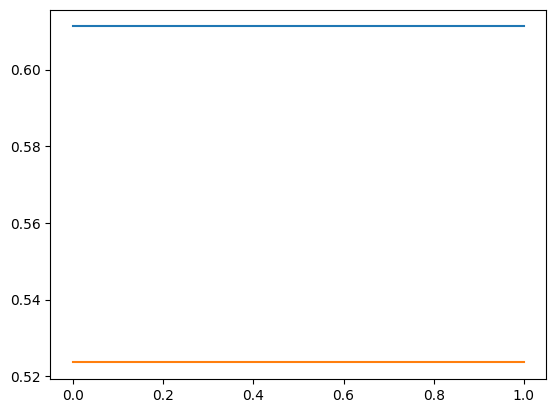

In [ ]:
import seaborn

seaborn.lineplot(history.history['loss']*2)
seaborn.lineplot(history.history['val_loss']*2)

Getting Test Prediction
  2/520 [..............................] - ETA: 31s  

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2436: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


520/520 [==============================] - 36s 63ms/step
F1-Score 0.7809580889774934
Precision-Score 0.7874588567568808
Recall-Score 0.7813214586592852
accuracy_Score 0.7813214586592852
CPU times: user 24.5 s, sys: 3.84 s, total: 28.3 s
Wall time: 35.9 s


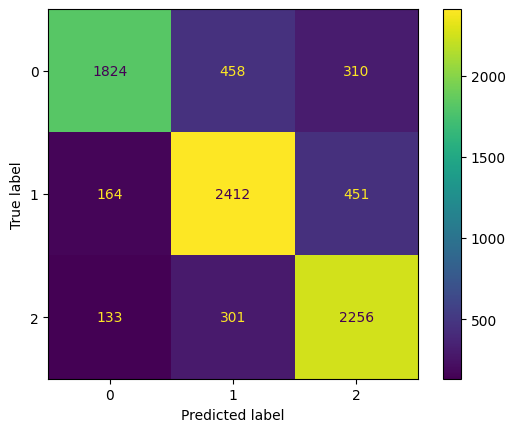

In [ ]:
%%time
from tqdm.auto import tqdm

print("Getting Test Prediction")
prediction = model.predict(tf_test_set)
prediction = [np.argmax(x) for x in prediction[0]]

actual_labels = data['test']['label']

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,prediction,average='weighted'))
print("Precision-Score",precision_score(actual_labels,prediction,average='weighted'))
print("Recall-Score",recall_score(actual_labels,prediction,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,prediction))

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,prediction,num_classes=3).numpy())
cmd.plot()

### Code For Using BERT as Embedding Layer

In [ ]:
import tensorflow as tf

class BERTEmbedding(tf.keras.layers.Layer):
    def __init__(self, model,tokenizer, max_token_len=128,padding='max_length',truncation=True):
        super().__init__()
        self.embedding = model
        self.tokenizer = tokenizer
        self.max_token = max_token_len
        self.padding = padding
        self.truncation = truncation
        self.trainable=False

    def call(self, x):
        return self.embedding(self.tokenizer(x,padding=self.padding,truncation=self.truncation,max_length=self.max_token,return_tensors='tf'))[1]

In [ ]:
# model.bert(tokenizer('बैंक तथा वित्तीय संस्थामा देखिएको विश्वासको',padding='max_length',truncation=True,return_tensors='tf',max_length=128))
embd = BERTEmbedding(model.bert,tokenizer,max_token_len=100)
# embd(["",'बैंक तथा वित्तीय संस्थामा देखिएको विश्वासको','बैंक तथा वित्तीय संस्थामा देखिएको विश्वासको'])
# embd(["abcd"])
d_model = embd(["abcd",'efgh']).shape[1]
d_model

768

In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data,model_dim, batch_size=32,shuffle=True):
        'Initialization'
        self.batch_size = batch_size
        self.data = data
        self.embeddings = np.empty((data.num_rows,model_dim))
        self.shuffle = shuffle
        # self.average = tf.keras.layers.Average()
        self.is_first_epoch = True
        self.on_epoch_end(is_first_epoch=self.is_first_epoch)

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.ceil(self.data.num_rows / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        return self.__data_generation(indexes)

    def on_epoch_end(self,is_first_epoch=False):
        'Updates indexes after each epoch'
        self.indexes = np.arange(self.data.num_rows)
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

        self.is_first_epoch = is_first_epoch


    def __data_generation(self, indexes):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        chunk = self.data.select(indexes)

        if self.is_first_epoch:
            X = embd(chunk['text'])
            self.embeddings[indexes] = X
        else:
            X = self.embeddings[indexes]

        y = np.array(chunk['label'])
        return X,y

In [ ]:
%%time

train_features = DataGenerator(data['train'],model_dim=d_model,batch_size=16)
test_features = DataGenerator(data['test'],model_dim=d_model,shuffle=False)

CPU times: user 1.99 ms, sys: 7 µs, total: 1.99 ms
Wall time: 1.77 ms


## Model Specification

In [ ]:
sa_model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(768)),
    tf.keras.layers.Dense(768,activation='relu',name='Pooler'),
    tf.keras.layers.Dropout(0.15,name='Dropout'),
    tf.keras.layers.Dense(3,activation='softmax',name='Activation')
])

In [ ]:
sa_model.compile(
  optimizer=tf.keras.optimizers.Adam(
        learning_rate=5e-4,
        weight_decay=0.1
      ),
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

sa_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Pooler (Dense)              (None, 768)               590592    
                                                                 
 Dropout (Dropout)           (None, 768)               0         
                                                                 
 Activation (Dense)          (None, 3)                 2307      
                                                                 
Total params: 592,899
Trainable params: 592,899
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = sa_model.fit(train_features,
        epochs=30,
        validation_data=test_features,
        callbacks=[tf.keras.callbacks.EarlyStopping(
                            monitor='val_acc', patience=3,
                            verbose=1, mode='auto',
                            restore_best_weights=True)
                        ])

Epoch 1/30
2077/2077 [==============================] - 427s 205ms/step - loss: 0.4403 - acc: 0.8272 - val_loss: 0.5312 - val_acc: 0.7824
Epoch 2/30
2077/2077 [==============================] - 9s 5ms/step - loss: 0.4305 - acc: 0.8301 - val_loss: 0.5276 - val_acc: 0.7849
Epoch 3/30
2077/2077 [==============================] - 9s 4ms/step - loss: 0.4309 - acc: 0.8316 - val_loss: 0.5323 - val_acc: 0.7826
Epoch 4/30
2077/2077 [==============================] - 9s 5ms/step - loss: 0.4304 - acc: 0.8309 - val_loss: 0.5416 - val_acc: 0.7852
Epoch 5/30
2077/2077 [==============================] - 9s 4ms/step - loss: 0.4277 - acc: 0.8320 - val_loss: 0.5347 - val_acc: 0.7828
Epoch 6/30
2077/2077 [==============================] - 9s 4ms/step - loss: 0.4285 - acc: 0.8329 - val_loss: 0.5272 - val_acc: 0.7834
Epoch 7/30
2077/2077 [==============================] - 9s 5ms/step - loss: 0.4277 - acc: 0.8316 - val_loss: 0.5184 - val_acc: 0.7863
Epoch 8/30
2077/2077 [==============================] - 9s

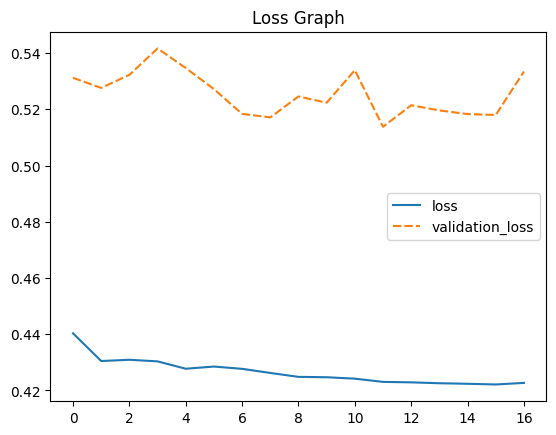

Text(0.5, 1.0, 'Accuracy Graph')

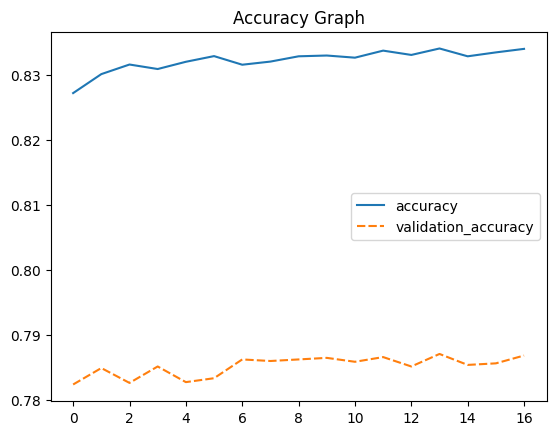

In [ ]:
import seaborn
from matplotlib import pyplot as plt

seaborn.lineplot({"loss":history.history['loss'],"validation_loss":history.history['val_loss']})
plt.title("Loss Graph")
plt.show()

seaborn.lineplot({"accuracy":history.history['acc'],"validation_accuracy":history.history['val_acc']})
plt.title("Accuracy Graph")

## Evaluation Section

In [ ]:
%%time

print("Getting Test Prediction")
pred_labels = [np.argmax(x) for x in sa_model.predict(test_features)]
actual_labels = data['test']['label']

Getting Test Prediction
260/260 [==============================] - 1s 3ms/step
CPU times: user 1.33 s, sys: 117 ms, total: 1.45 s
Wall time: 1.14 s


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,pred_labels,average='weighted'))
print("Precision-Score",precision_score(actual_labels,pred_labels,average='weighted'))
print("Recall-Score",recall_score(actual_labels,pred_labels,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,pred_labels))

F1-Score 0.7872538628815546
Precision-Score 0.7925882550762468
Recall-Score 0.7870983271151764
accuracy_Score 0.7870983271151764


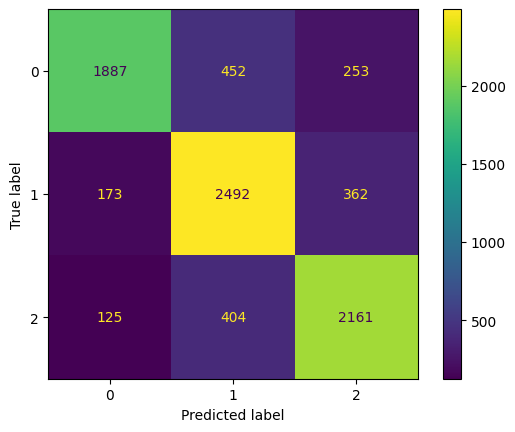

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,pred_labels,num_classes=3).numpy())
cmd.plot()